<a href="https://colab.research.google.com/github/bebas811/house-prediction-/blob/main/Benja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn import linear_model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing 



In [ ]:
!unzip 24824_33185_bundle_archive.zip

unzip:  cannot find or open 24824_33185_bundle_archive.zip, 24824_33185_bundle_archive.zip.zip or 24824_33185_bundle_archive.zip.ZIP.


In [ ]:
house_df_main = pd.read_csv('/content/housing.csv')
house_df = house_df_main.copy()



In [ ]:
house_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
house_df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
house_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
house_df.fillna(house_df.mean(), inplace=True)

<ipython-input-11-112b5b838bf9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house_df.fillna(house_df.mean(), inplace=True)


<Axes: >

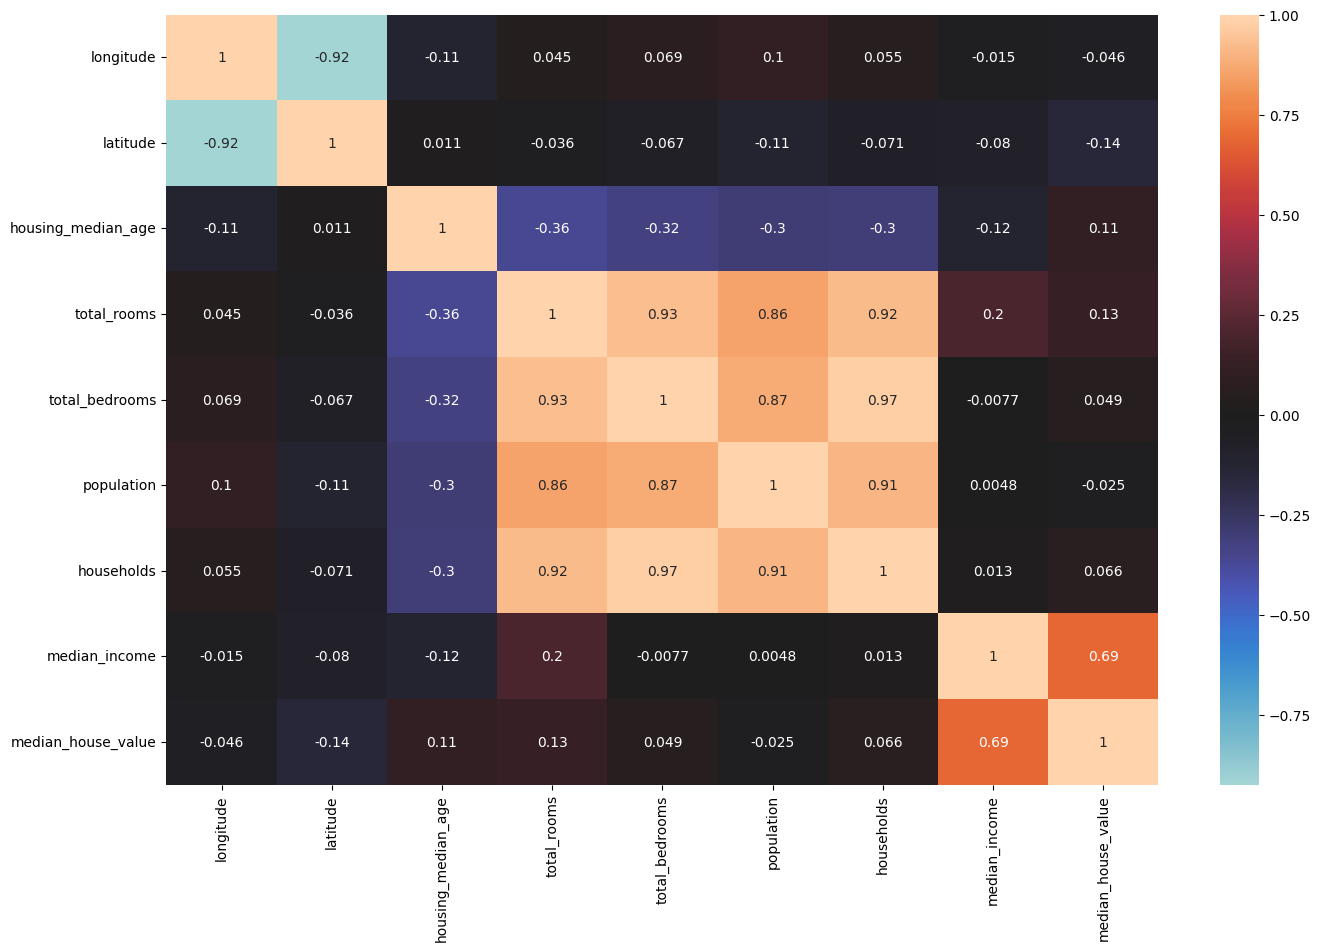

In [ ]:
#initial Correlation
plt.figure(figsize = (16,10))
sns.heatmap(house_df.corr(),annot=True,center=0 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

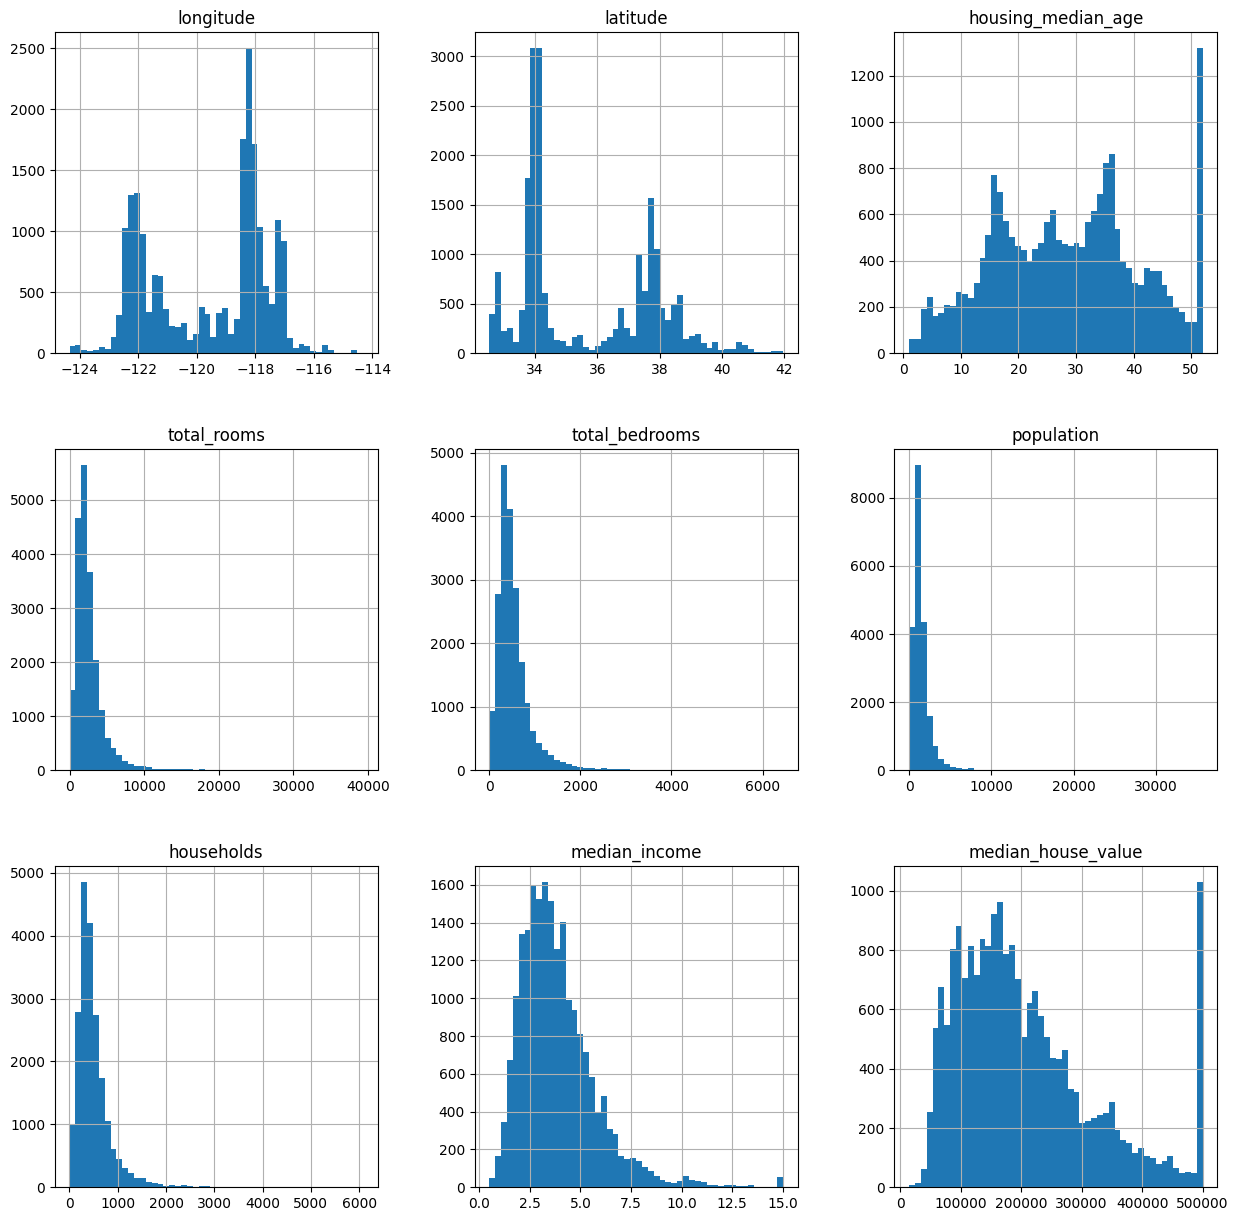

In [ ]:
house_df.hist(bins=50, figsize=(15, 15))

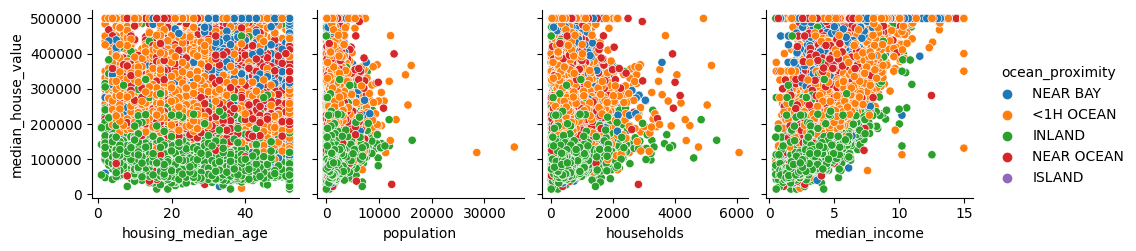

In [ ]:
sns.pairplot(house_df, x_vars=['housing_median_age', 'population', 'households', 'median_income'],y_vars ='median_house_value',hue = 'ocean_proximity')

In [ ]:
house_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
house_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Axes: >

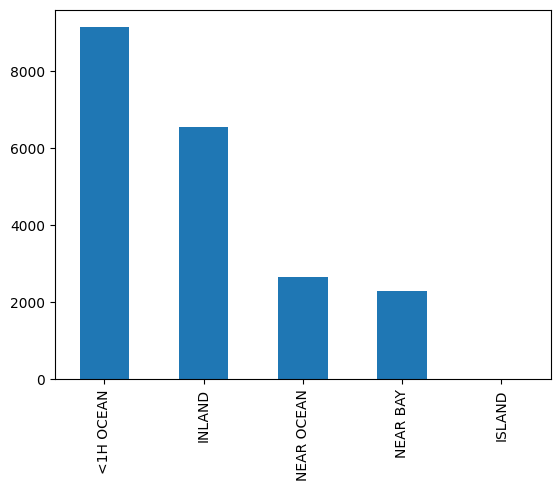

In [ ]:
house_df['ocean_proximity'].value_counts().plot(kind='bar')

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

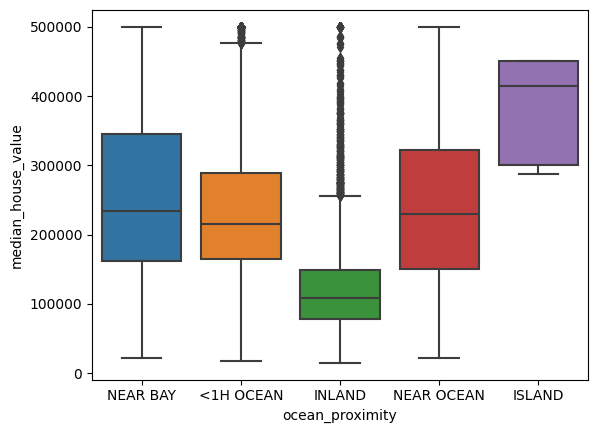

In [ ]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=house_df)

<Axes: xlabel='ocean_proximity', ylabel='median_income'>

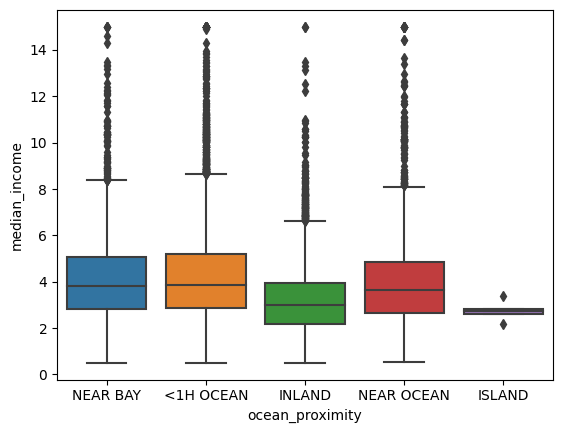

In [ ]:
sns.boxplot(x="ocean_proximity", y="median_income", data=house_df)

<ipython-input-26-86f8ef181a7f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['total_bedrooms'],color='red')
<ipython-input-26-86f8ef181a7f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['total_rooms'],color='blue')


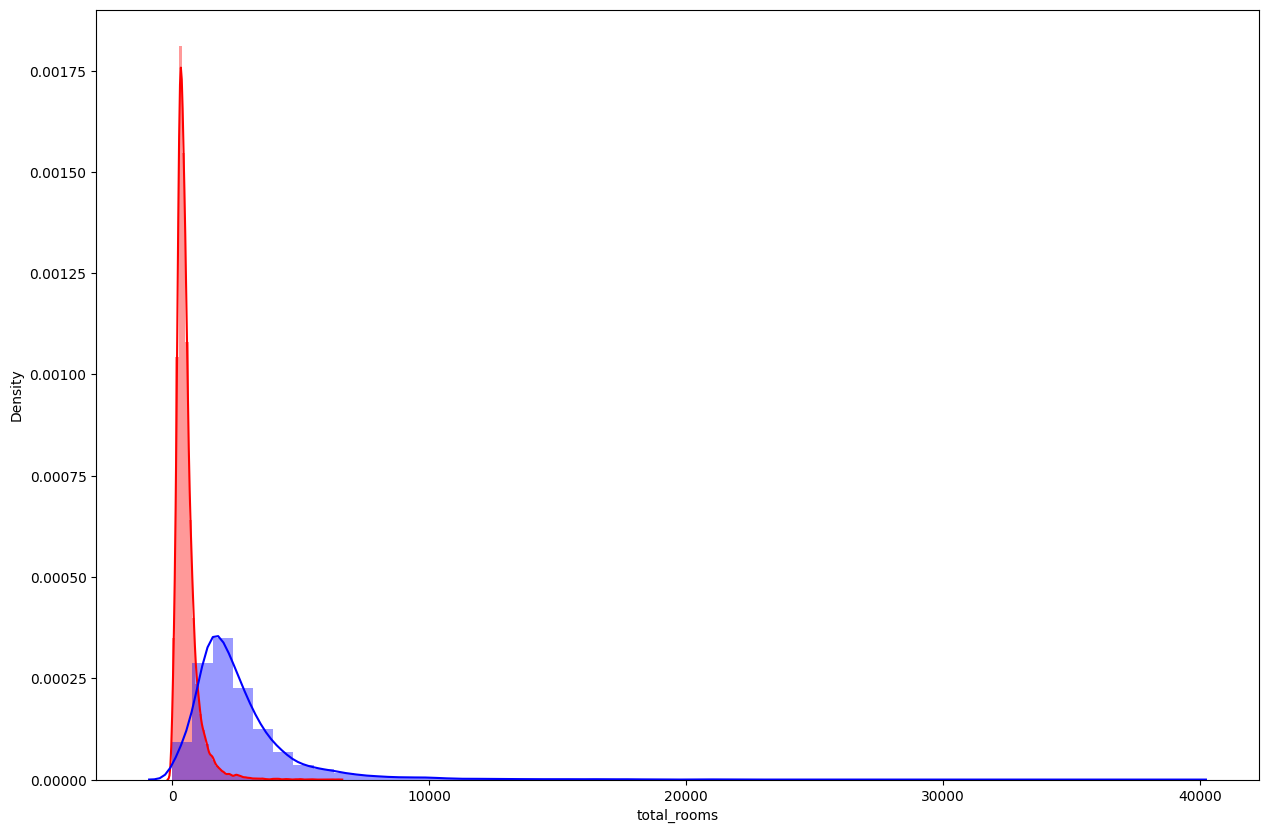

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(house_df['total_bedrooms'],color='red')
sns.distplot(house_df['total_rooms'],color='blue')
plt.show()

<ipython-input-27-3603e5e43948>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((house_df['total_rooms']/house_df['total_bedrooms']),color='green')


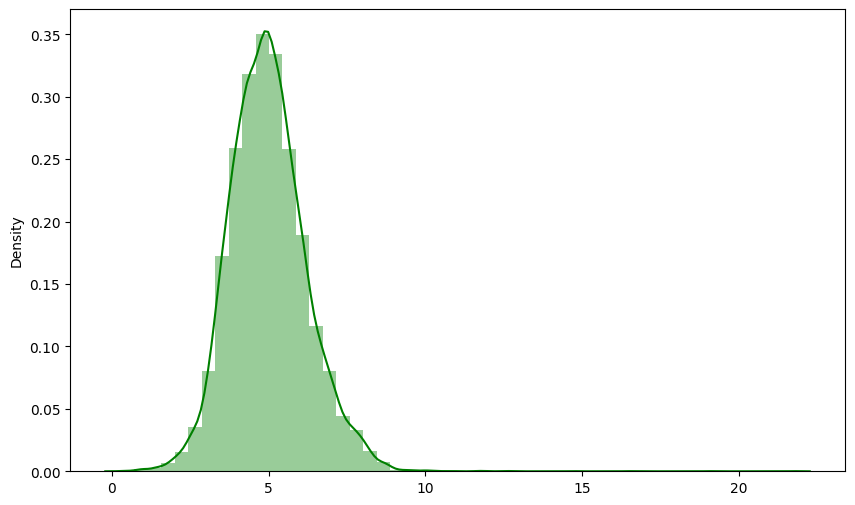

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot((house_df['total_rooms']/house_df['total_bedrooms']),color='green')
plt.show()

In [ ]:
house_df['room_bed'] = (house_df['total_rooms']/house_df['total_bedrooms'])

In [ ]:
house_df['room_bed']

0        6.821705
1        6.418626
2        7.721053
3        5.421277
4        5.810714
           ...   
20635    4.451872
20636    4.646667
20637    4.647423
20638    4.547677
20639    4.521104
Name: room_bed, Length: 20640, dtype: float64

In [ ]:
house_df1 = house_df.copy()
house_df1 = house_df1.loc[ house_df1['room_bed']<10.0]

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(house_df['room_bed'],color='green',)

plt.figure(figsize=(10,6))
sns.boxplot(house_df1['room_bed'],color='red')

plt.show()

In [ ]:
house_df1.info()

In [ ]:

house_df1.plot.scatter(x='housing_median_age', y='population')


In [ ]:
house_df1 = house_df1.loc[ house_df['population']<20000]

In [ ]:
house_df1.info()

In [ ]:
house_df1.plot.scatter(x='housing_median_age', y='population')